In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
!pip install openpyxl
!pip install --upgrade pip

In [7]:
df = pd.read_excel('pizza-hut.xlsx')

df.head()

,Bill_ID,Channel,Transaction_Date,Sales_Amount,Customer_ID,Customer_Gender,Voucher_Used
0,0,Delivery,2023-03-28 00:00:00+00:00,203246,222315,Unknown,No
1,1,Delivery,2022-12-08 00:00:00+00:00,239014,131419,Unknown,No
2,2,Delivery,2022-03-05 00:00:00+00:00,151803,279331,Unknown,No
3,3,Delivery,2022-07-29 00:00:00+00:00,236821,313468,Unknown,No
4,4,Delivery,2021-11-25 00:00:00+00:00,158267,76851,Unknown,No


In [46]:
print("Shape of the dataset:", df.shape)

print("\nData types:")
for column, dtype in df.dtypes.items():
    print(f"{column:<20} {dtype}")

df.columns = df.columns.str.strip()

print("\nMissing values:")
for column in df.columns:
    print(f"{column:<20} {df[column].isnull().sum()}")

Shape of the dataset: (508365, 10)

Data types:
bill_id              int64
channel              object
transaction_date     datetime64[ns, UTC]
sales_amount         int64
customer_id          int64
customer_gender      object
voucher_used         object
YearMonth            period[M]
Week                 period[W-SUN]
sales_amount_million float64

Missing values:
bill_id              0
channel              0
transaction_date     0
sales_amount         0
customer_id          0
customer_gender      0
voucher_used         0
YearMonth            0
Week                 0
sales_amount_million 0


In [10]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

df['Transaction_Date'].head()

0   2023-03-28 00:00:00+00:00
1   2022-12-08 00:00:00+00:00
2   2022-03-05 00:00:00+00:00
3   2022-07-29 00:00:00+00:00
4   2021-11-25 00:00:00+00:00
Name: Transaction_Date, dtype: datetime64[ns, UTC]

In [11]:
df.describe()

,Bill_ID,Sales_Amount,Customer_ID
count,508365.000000,5.083650e+05,508365.000000
mean,254182.000000,3.096550e+05,172916.848200
std,146752.479136,3.049327e+05,99693.090627
min,0.000000,-2.363000e+03,0.000000
25%,127091.000000,1.779810e+05,86710.000000
50%,254182.000000,2.611080e+05,172927.000000
75%,381273.000000,3.638960e+05,259209.000000
max,508364.000000,3.133970e+07,345583.000000


In [12]:
total_sales = df['Sales_Amount'].sum()

print("Total Sales Amount:", total_sales)

Total Sales Amount: 157417770414


In [13]:
print("Unique values in channel:\n", df['Channel'].value_counts())

print("\nUnique values in customer_gender:\n", df['Customer_Gender'].value_counts())

print("\nUnique values in voucher_used:\n", df['Voucher_Used'].value_counts())

Unique values in channel:
 Channel
Take Away    250882
Delivery     241097
Dine In       16386
Name: count, dtype: int64

Unique values in customer_gender:
 Customer_Gender
Unknown    301779
Male       140201
Female      66385
Name: count, dtype: int64

Unique values in voucher_used:
 Voucher_Used
No     444136
Yes     64229
Name: count, dtype: int64


In [14]:
df.columns = df.columns.str.lower()

print(df.columns)

Index(['bill_id', 'channel', 'transaction_date', 'sales_amount', 'customer_id',
       'customer_gender', 'voucher_used'],
      dtype='object')


In [27]:
# Filter data for September 2021
september_data = df[df['transaction_date'].dt.to_period('M') == '2021-09']

# Check the number of transactions in September 2021
num_transactions_september = len(september_data)
print(f"Number of transactions in September 2021: {num_transactions_september}")

# Analyze daily sales in September 2021
daily_sales_september = september_data.groupby(september_data['transaction_date'].dt.date)['sales_amount'].sum()
print("\nDaily Sales in September 2021:\n", daily_sales_september)

Number of transactions in September 2021: 230

Daily Sales in September 2021:
 transaction_date
2021-09-30    71214505
Name: sales_amount, dtype: int64


/var/folders/2x/9rs4qchj3q59kj_wgvclvld00000gn/T/ipykernel_27169/2475259245.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  september_data = df[df['transaction_date'].dt.to_period('M') == '2021-09']


In [20]:
# Extract year and month for monthly analysis
df['YearMonth'] = df['transaction_date'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['sales_amount'].sum().reset_index()

# Display the results
print("Monthly Sales Trends:\n", monthly_sales)

Monthly Sales Trends:
    YearMonth  sales_amount
0    2021-09      71214505
1    2021-10    7748034194
2    2021-11    6971930209
3    2021-12    8302909416
4    2022-01    7776409136
5    2022-02    7674409130
6    2022-03    7695047754
7    2022-04    7122599579
8    2022-05    8568532306
9    2022-06    8179670533
10   2022-07    7617120437
11   2022-08    7492380158
12   2022-09    7213884071
13   2022-10    6922196951
14   2022-11    6051384385
15   2022-12    7408246302
16   2023-01    8699816958
17   2023-02    5832369834
18   2023-03    7191362853
19   2023-04    6871167794
20   2023-05    8607552965
21   2023-06    7399530944


/var/folders/2x/9rs4qchj3q59kj_wgvclvld00000gn/T/ipykernel_27169/468767586.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['YearMonth'] = df['transaction_date'].dt.to_period('M')


/var/folders/2x/9rs4qchj3q59kj_wgvclvld00000gn/T/ipykernel_27169/1686760006.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['YearMonth'] = df['transaction_date'].dt.to_period('M')


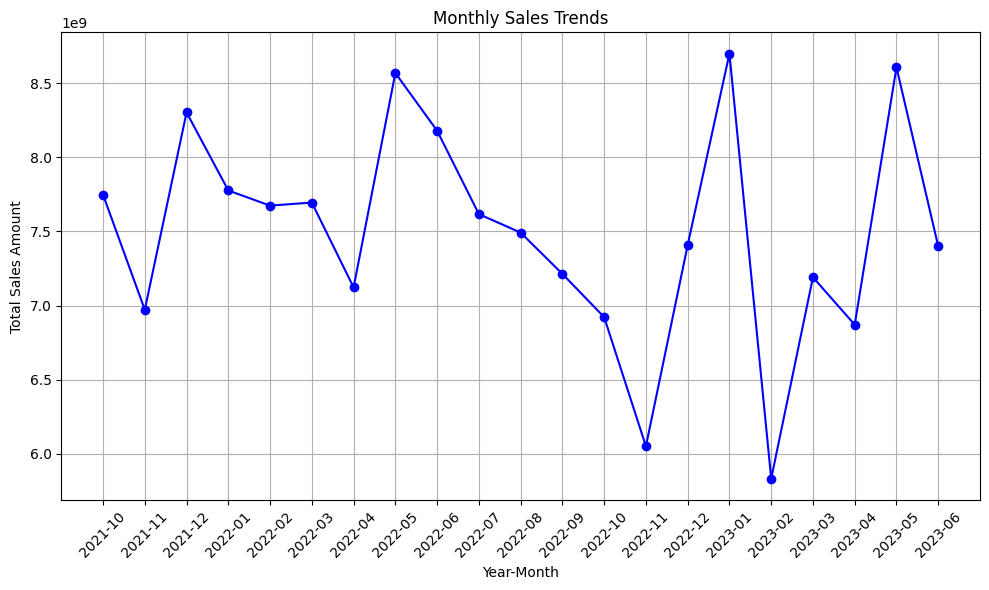

In [44]:
# Extract year and month for monthly analysis
df['YearMonth'] = df['transaction_date'].dt.to_period('M')

# Calculate monthly sales
monthly_sales = df.groupby('YearMonth')['sales_amount'].sum().reset_index()

# Remove the data for September 2021
monthly_sales_filtered = monthly_sales[monthly_sales['YearMonth'] != '2021-09']

# Plotting the updated monthly sales trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_filtered['YearMonth'].astype(str), monthly_sales_filtered['sales_amount'], marker='o', linestyle='-', color='b')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales Amount')
plt.title('Monthly Sales Trends')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
# Calculate total and average sales per channel
channel_sales_total = df.groupby('channel')['sales_amount'].sum().reset_index()

# Display the results
print("Total Sales by Channel:\n", channel_sales_total)

Total Sales by Channel:
      channel  sales_amount
0   Delivery   83938642531
1    Dine In    7339439908
2  Take Away   66139687975


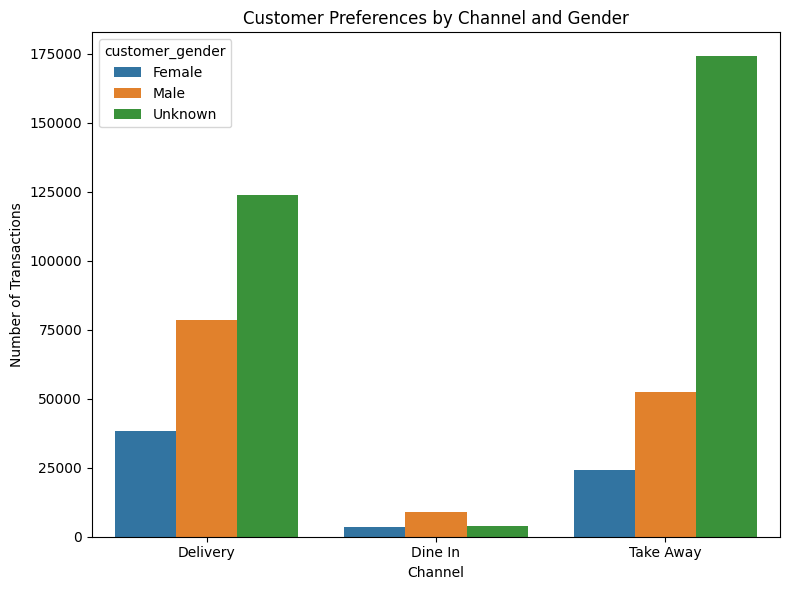

In [48]:
# Group by channel and customer gender to analyze preferences
customer_channel_gender = df.groupby(['channel', 'customer_gender']).size().reset_index(name='count')

# Plot the preferences by channel and gender
plt.figure(figsize=(8, 6))
sns.barplot(data=customer_channel_gender, x='channel', y='count', hue='customer_gender')

plt.title('Customer Preferences by Channel and Gender')
plt.xlabel('Channel')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

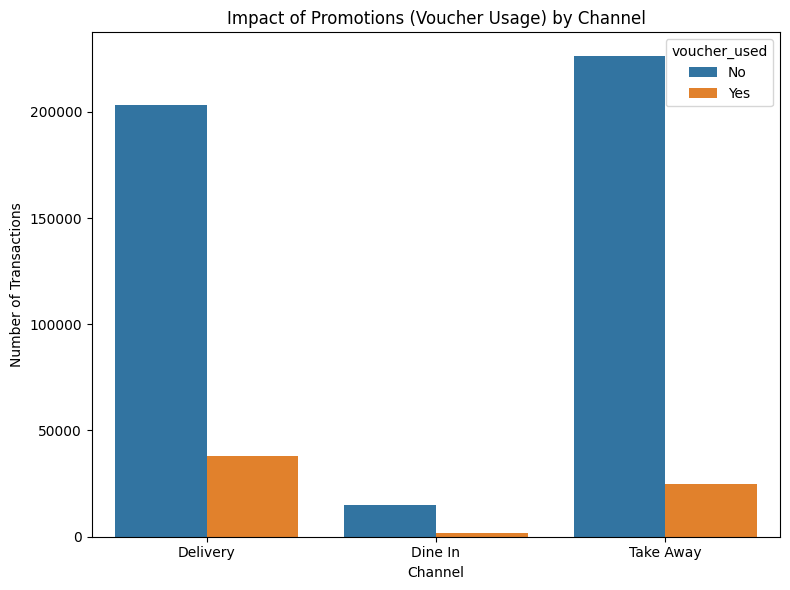

In [49]:
# Group by channel and voucher usage to analyze the impact of promotions
voucher_usage_channel = df.groupby(['channel', 'voucher_used']).size().reset_index(name='count')

# Plot the impact of promotions
plt.figure(figsize=(8, 6))
sns.barplot(data=voucher_usage_channel, x='channel', y='count', hue='voucher_used')

plt.title('Impact of Promotions (Voucher Usage) by Channel')
plt.xlabel('Channel')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

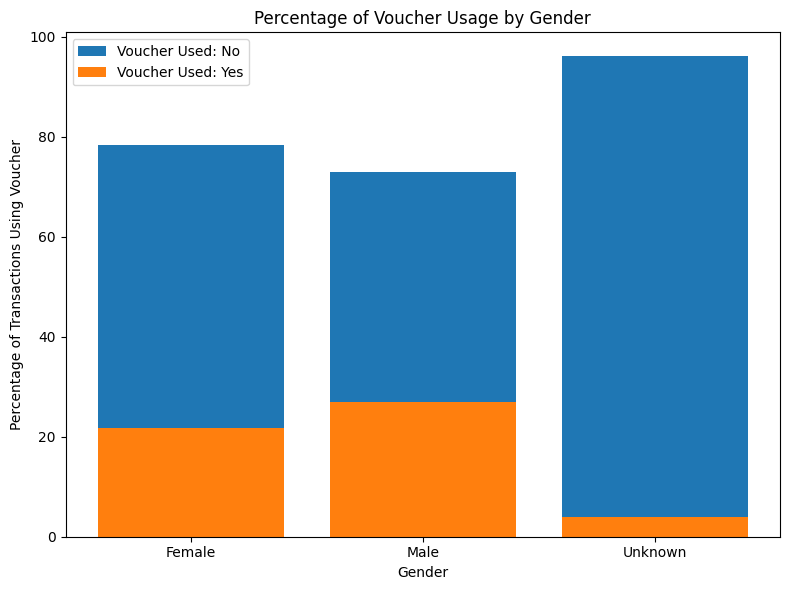

In [52]:
# Group by gender and voucher usage to analyze the likelihood of voucher usage
voucher_usage_gender = df.groupby(['customer_gender', 'voucher_used']).size().reset_index(name='count')

# Calculate the total number of transactions per gender
total_transactions_gender = df['customer_gender'].value_counts().reset_index()
total_transactions_gender.columns = ['customer_gender', 'total_transactions']

# Merge the data to compute the percentage of voucher usage by gender
voucher_usage_gender = voucher_usage_gender.merge(total_transactions_gender, on='customer_gender')
voucher_usage_gender['percentage'] = (voucher_usage_gender['count'] / voucher_usage_gender['total_transactions']) * 100

# Plot the percentage of voucher usage by gender using Matplotlib
fig, ax = plt.subplots(figsize=(8, 6))

# Plot data for each voucher usage category
for voucher in voucher_usage_gender['voucher_used'].unique():
    data = voucher_usage_gender[voucher_usage_gender['voucher_used'] == voucher]
    ax.bar(data['customer_gender'], data['percentage'], label=f'Voucher Used: {voucher}')

# Customize the plot
ax.set_title('Percentage of Voucher Usage by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage of Transactions Using Voucher')
ax.legend()
plt.tight_layout()
plt.show()
